In [0]:
import pandas as pd
from keras.layers import Bidirectional, GlobalMaxPool1D, MaxPooling1D, Add, Flatten

Using TensorFlow backend.


In [0]:
import pandas as pd
from keras.layers import Bidirectional, GlobalMaxPool1D, MaxPooling1D, Add, Flatten

In [0]:
from google.colab import files
uploaded = files.upload()


Saving currency_daily_BTC_CNY (1)(1).csv to currency_daily_BTC_CNY (1)(1) (2).csv


In [0]:
data=pd.read_csv("currency_daily_BTC_CNY (1)(1).csv")
data.head()

,timestamp,open (CNY),high (CNY),low (CNY),close (CNY),open (USD),high (USD),low (USD),close (USD),volume,market cap (USD)
0,2019-04-03,36579.606459,37337.266173,33347.115040,34209.630322,5440.654230,5563.343392,4970.949063,5097.242100,124.847322,6.363770e+05
1,2019-04-02,31113.943447,36587.158280,31098.460777,36587.158280,4635.946148,5441.777448,4633.639246,5441.777448,5451.446216,2.966556e+07
2,2019-04-01,30791.863008,31248.864005,30772.364322,31156.717159,4587.515547,4656.017929,4584.615159,4642.319388,4955.242631,2.300382e+07
3,2019-03-31,30690.550021,30791.526483,30656.396422,30791.526483,4572.489601,4587.465409,4567.401163,4587.465409,5319.489809,2.440298e+07
4,2019-03-30,30719.061815,30816.158697,30628.164930,30690.302659,4576.737485,4591.203647,4563.195041,4572.452748,6683.322670,3.055918e+07


In [0]:
df_data = pd.DataFrame(data, columns = ['timestamp','open (USD)', 'high (USD)',
                                            'low (USD)', 'close (USD)','volume'])

In [0]:
#Drop columns which contain only missing values
df_column_drop = data.dropna(axis=1, how='all')
df_column_drop

,timestamp,open (CNY),high (CNY),low (CNY),close (CNY),open (USD),high (USD),low (USD),close (USD),volume,market cap (USD)
0,2019-04-03,36579.606459,37337.266173,33347.115040,34209.630322,5440.654230,5563.343392,4970.949063,5097.242100,124.847322,6.363770e+05
1,2019-04-02,31113.943447,36587.158280,31098.460777,36587.158280,4635.946148,5441.777448,4633.639246,5441.777448,5451.446216,2.966556e+07
2,2019-04-01,30791.863008,31248.864005,30772.364322,31156.717159,4587.515547,4656.017929,4584.615159,4642.319388,4955.242631,2.300382e+07
3,2019-03-31,30690.550021,30791.526483,30656.396422,30791.526483,4572.489601,4587.465409,4567.401163,4587.465409,5319.489809,2.440298e+07
4,2019-03-30,30719.061815,30816.158697,30628.164930,30690.302659,4576.737485,4591.203647,4563.195041,4572.452748,6683.322670,3.055918e+07
5,2019-03-29,30313.519344,30762.089547,30240.134488,30717.115002,4498.189491,4582.192271,4497.563324,4576.447435,5921.879893,2.710117e+07
6,2019-03-28,30223.512880,30357.439527,30165.237249,30313.681254,4492.799843,4505.073779,4482.071307,4498.213516,4844.988941,2.179379e+07
7,2019-03-27,29567.601307,30300.166290,29544.722271,30269.090953,4402.760423,4504.194562,4399.353622,4499.575136,6112.207429,2.750234e+07
8,2019-03-26,29508.630192,29590.166583,29309.565906,29524.919376,4398.102572,4410.345862,4364.660095,4396.404874,5820.092172,2.558748e+07
9,2019-03-25,29986.316520,30012.862008,29294.899898,29514.686840,4463.511493,4469.392060,4366.251908,4399.005283,4754.827569,2.091651e+07


In [0]:
# Select the rows of where data is not NaN
df_notnull = data[data['open (USD)'].notnull()& data['high (USD)'].notnull()&data['low (USD)'].notnull()&data['close (USD)']]
df_notnull

,timestamp,open (CNY),high (CNY),low (CNY),close (CNY),open (USD),high (USD),low (USD),close (USD),volume,market cap (USD)
0,2019-04-03,36579.606459,37337.266173,33347.115040,34209.630322,5440.654230,5563.343392,4970.949063,5097.242100,124.847322,6.363770e+05
1,2019-04-02,31113.943447,36587.158280,31098.460777,36587.158280,4635.946148,5441.777448,4633.639246,5441.777448,5451.446216,2.966556e+07
2,2019-04-01,30791.863008,31248.864005,30772.364322,31156.717159,4587.515547,4656.017929,4584.615159,4642.319388,4955.242631,2.300382e+07
3,2019-03-31,30690.550021,30791.526483,30656.396422,30791.526483,4572.489601,4587.465409,4567.401163,4587.465409,5319.489809,2.440298e+07
4,2019-03-30,30719.061815,30816.158697,30628.164930,30690.302659,4576.737485,4591.203647,4563.195041,4572.452748,6683.322670,3.055918e+07
5,2019-03-29,30313.519344,30762.089547,30240.134488,30717.115002,4498.189491,4582.192271,4497.563324,4576.447435,5921.879893,2.710117e+07
6,2019-03-28,30223.512880,30357.439527,30165.237249,30313.681254,4492.799843,4505.073779,4482.071307,4498.213516,4844.988941,2.179379e+07
7,2019-03-27,29567.601307,30300.166290,29544.722271,30269.090953,4402.760423,4504.194562,4399.353622,4499.575136,6112.207429,2.750234e+07
8,2019-03-26,29508.630192,29590.166583,29309.565906,29524.919376,4398.102572,4410.345862,4364.660095,4396.404874,5820.092172,2.558748e+07
9,2019-03-25,29986.316520,30012.862008,29294.899898,29514.686840,4463.511493,4469.392060,4366.251908,4399.005283,4754.827569,2.091651e+07


In [0]:
df_column_drop.shape

(1829, 11)

In [0]:
df_notnull.shape

(1829, 11)

#Visualization of Data

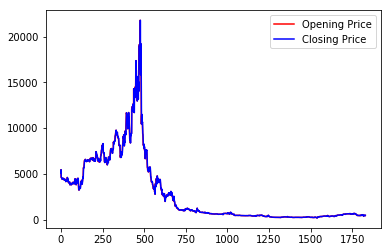

In [0]:
#plt.plot(data['timestamp'])
import matplotlib.pyplot as plt
plt.plot(data['open (USD)'],color = 'red', label = 'Opening Price')
plt.plot(data['close (USD)'],color = 'blue', label = 'Closing Price')
plt.legend()

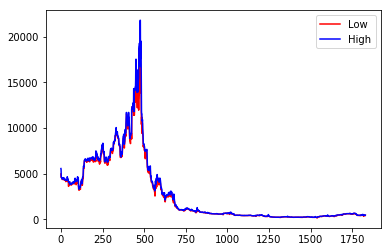

In [0]:
import matplotlib.pyplot as plt
plt.plot(data['low (USD)'],color = 'red', label = 'Low')
plt.plot(data['high (USD)'],color = 'blue', label = 'High')
plt.legend()

In [0]:

train_data=df_data[df_data.iloc[:,0]<'2018-01-01']
train_data=train_data.iloc[::-1]

In [0]:
train_data.shape

(1371, 6)

In [0]:
test_data=df_data[df_data.iloc[:,0]>='2018-01-01']
test_data=test_data.iloc[::-1]
test_data

,timestamp,open (USD),high (USD),low (USD),close (USD),volume
457,2018-01-01,13897.860153,13900.412448,13142.529558,13512.425139,0.189480
456,2018-01-02,13512.425139,15017.280049,13401.054068,14729.885629,0.125810
455,2018-01-03,14729.885629,15159.653779,14682.472485,14823.642983,0.198600
454,2018-01-04,14823.642983,15105.634227,14376.662100,14618.087339,0.154260
453,2018-01-05,14618.087339,16324.421055,14608.490096,16324.421055,0.156280
452,2018-01-06,16324.421055,16924.930396,15553.208978,16287.514245,0.127553
451,2018-01-07,16287.514245,17542.149523,16287.514245,17377.399762,4.908762
450,2018-01-08,17377.399762,17409.407700,14424.687699,14971.887824,0.188423
449,2018-01-09,14971.887824,15310.537078,14214.626782,14214.626782,0.132650
448,2018-01-10,14214.626782,14511.840151,13678.207975,14511.840151,0.216350


In [0]:
test_data.shape

(458, 6)

In [0]:
  train_coin_price = train_data.iloc[:, 1:2].values
  train_coin_price

array([[  453.42760964],
       [  462.04075834],
       [  413.7082918 ],
       ...,
       [13621.86984878],
       [14398.62562892],
       [12956.81469629]])

In [0]:
import numpy as np
train_coin_price=np.flipud(train_coin_price) 

In [0]:

real_coin_price = test_data.iloc[:, 1:2].values
real_coin_price

array([[13897.86015322],
       [13512.4251392 ],
       [14729.88562879],
       [14823.64298315],
       [14618.08733859],
       [16324.42105474],
       [16287.51424529],
       [17377.39976214],
       [14971.88782446],
       [14214.62678211],
       [14511.8401512 ],
       [13739.56006518],
       [13706.4256735 ],
       [14171.39782147],
       [13341.65037719],
       [14243.63551113],
       [14177.41720088],
       [11697.19396615],
       [11781.84063887],
       [11790.50139854],
       [14307.71834904],
       [11775.8566193 ],
       [12052.26203872],
       [11797.27729555],
       [12633.57983272],
       [12104.96671139],
       [12111.44345702],
       [12337.34979456],
       [12337.34979456],
       [12337.34979456],
       [12337.34979456],
       [12094.23064384],
       [12084.04538124],
       [ 9411.71444663],
       [ 9410.44542794],
       [ 9410.44542794],
       [ 9410.44542794],
       [ 9174.50463453],
       [ 9198.87649377],
       [ 9198.87649377],


In [0]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
train_set_scaled = sc.fit_transform(train_coin_price)

In [0]:
train_set_scaled.shape

(1371, 1)

In [0]:
import numpy as np
X_train = []
y_train = []
for i in range(60, 1371):
    X_train.append(train_set_scaled[i-60:i, 0])
    y_train.append(train_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)

In [0]:
X_train.shape

(1311, 60)

In [0]:
y_train.shape

(1311,)

In [0]:
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))

In [0]:
X_train.shape

(1311, 60, 1)

In [0]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM,GRU
from keras.layers import Dropout
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.recurrent import LSTM, GRU
from keras.layers import Convolution1D, MaxPooling1D, AtrousConvolution1D, RepeatVector
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, CSVLogger
from keras.layers.wrappers import Bidirectional
from keras import regularizers
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import *
from keras.optimizers import RMSprop, Adam, SGD, Nadam
from keras.initializers import *

In [0]:
X_train.shape[1]

60

In [0]:
regressor = Sequential()

In [0]:
regressor.add(Bidirectional(GRU(units = 50, return_sequences=True,input_shape = (X_train.shape[1], 1))))
regressor.add(Dropout(0.2))

In [0]:
regressor.add(Bidirectional(GRU(units = 50)))
regressor.add(Dropout(0.2))

In [0]:

regressor.add(Dense(32,kernel_initializer="uniform",activation='relu'))        
regressor.add(Dense(1,kernel_initializer="uniform",activation='linear'))

In [0]:

regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
regressor.fit(X_train, y_train, epochs = 40, batch_size = 256)

Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Epoch 1/40
1311/1311 [==============================] - 5s 4ms/step - loss: 0.0033
Epoch 2/40
1311/1311 [==============================] - 3s 2ms/step - loss: 0.0023
Epoch 3/40
1311/1311 [==============================] - 3s 2ms/step - loss: 0.0016
Epoch 4/40
1311/1311 [==============================] - 3s 2ms/step - loss: 8.5094e-04
Epoch 5/40
1311/1311 [==============================] - 3s 2ms/step - loss: 3.7179e-04
Epoch 6/40
1311/1311 [==============================] - 3s 2ms/step - loss: 4.8930e-04
Epoch 7/40
1311/1311 [==============================] - 3s 2ms/step - loss: 2.7704e-04
Epoch 8/40
1311/1311 [==============================] - 3s 2ms/step - loss: 2.6384e-04
Epoch 9/40
1311/1311 [==============================] - 3s 2ms/step - loss: 1.8715e-04
Epoch 10/40
1311/1311 [==============================] - 3s 2ms/st

In [0]:
import pandas as pd
total_open = pd.concat((train_data['open (USD)'], test_data['open (USD)']), axis = 0)

In [0]:
test_coin_price = total_open[len(total_open) - len(test_data) - 60:].values
test_coin_price = test_coin_price.reshape(-1,1)

In [0]:
test_coin_price = sc.transform(test_coin_price)
X_test = []
for i in range(60, 500):
    X_test.append(test_coin_price[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
predicted_coin_price = regressor.predict(X_test)
predicted_coin_price = sc.inverse_transform(predicted_coin_price)

In [0]:
XTest=np.reshape(X_test[0],(1,60,1))
X_test.shape

(440, 60, 1)

In [0]:
predicted=[]
for i in range(30):

  p=sc.inverse_transform(regressor.predict(XTest))
  predicted.append(sc.inverse_transform(regressor.predict(XTest)))
  XTest=np.reshape(XTest,(60))
  XTest=np.delete(XTest,0)
  XTest=np.append(XTest,sc.transform(p))
  XTest=np.reshape(XTest,(1,60,1))

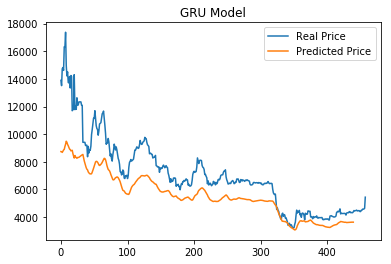

In [0]:
import matplotlib.pyplot as plt
plt.plot(real_coin_price,label = 'Real Price')
plt.plot(predicted_coin_price, label = 'Predicted Price')
plt.title('GRU Model')
plt.legend()

In [0]:
from sklearn import metrics
np.sqrt(metrics.mean_squared_error(real_coin_price[0:440],predicted_coin_price))

1959.3330065906846

In [0]:
def cal_target(df):
    list_y =[]
    temp = df
    for i in range(len(temp)-1):
        if temp[i+1] > temp[i]:
            y = 1
        else:
            y = -1
            
        list_y.append(y)
    ydf = pd.DataFrame(list_y)
    return ydf

In [0]:
real_coin_price_trend = cal_target(real_coin_price[0:440])
predicted_coin_price_trend =cal_target(predicted_coin_price)

In [0]:
from sklearn.metrics import accuracy_score
score = accuracy_score(real_coin_price_trend, predicted_coin_price_trend)
print(score)

0.5034168564920274


In [0]:
from sklearn.metrics import f1_score
f1_score(real_coin_price_trend, predicted_coin_price_trend)

0.46305418719211827

In [53]:
for i in range(1,10):
  print (f'For Epoch {10*i} \n')
  regressor = Sequential()
  regressor.add(Bidirectional(GRU(units = 50, return_sequences=True,input_shape = (X_train.shape[1], 1))))
  regressor.add(Dropout(0.2))
  regressor.add(Bidirectional(GRU(units = 50)))
  regressor.add(Dropout(0.2))
  regressor.add(Dense(32,kernel_initializer="uniform",activation='relu'))        
  regressor.add(Dense(1,kernel_initializer="uniform",activation='linear'))
  regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
  regressor.fit(X_train, y_train, epochs = 10*i, batch_size = 256,verbose=0)
  predicted_coin_price = regressor.predict(X_test)
  predicted_coin_price = sc.inverse_transform(predicted_coin_price) 
  real_coin_price_trend = cal_target(real_coin_price[0:67])
  predicted_coin_price_trend =cal_target(predicted_coin_price)
  real_df = pd.DataFrame(real_coin_price_trend)
  pred_df = pd.DataFrame(predicted_coin_price_trend)
  acc_df = pd.concat((real_df[0],pred_df[0]), axis=1)
  real_coin_price_trend = cal_target(real_coin_price[0:440])
  predicted_coin_price_trend =cal_target(predicted_coin_price)
  score = accuracy_score(real_coin_price_trend, predicted_coin_price_trend)
  print("accuracy", score)
  f1=f1_score(real_coin_price_trend, predicted_coin_price_trend)
  print("F1", f1)

For Epoch 10 

accuracy 0.510250569476082
F1 0.4584382871536524
For Epoch 20 

accuracy 0.4988610478359909
F1 0.4634146341463415
For Epoch 30 

accuracy 0.5034168564920274
F1 0.46568627450980393
For Epoch 40 

accuracy 0.5079726651480638
F1 0.47058823529411764
For Epoch 50 

accuracy 0.5125284738041003
F1 0.4805825242718446
For Epoch 60 

accuracy 0.49658314350797267
F1 0.46489104116222757
For Epoch 70 

accuracy 0.4988610478359909
F1 0.4711538461538462
For Epoch 80 

accuracy 0.5011389521640092
F1 0.477326968973747
For Epoch 90 

accuracy 0.49658314350797267
F1 0.47754137115839246


In [54]:
for i in range(1,6):
  print (f'For  {10*i} Hidden Layers \n')
  regressor = Sequential()
  regressor.add(Bidirectional(GRU(units = 10*i, return_sequences=True,input_shape = (X_train.shape[1], 1))))
  regressor.add(Dropout(0.2))
  regressor.add(Bidirectional(GRU(units = 10*i)))
  regressor.add(Dropout(0.2))
  regressor.add(Dense(32,kernel_initializer="uniform",activation='relu'))        
  regressor.add(Dense(1,kernel_initializer="uniform",activation='linear'))
  regressor.compile(optimizer = 'adam', loss = 'mean_squared_error')
  regressor.fit(X_train, y_train, epochs = 40, batch_size = 256,verbose=0)
  predicted_coin_price = regressor.predict(X_test)
  predicted_coin_price = sc.inverse_transform(predicted_coin_price)
  real_coin_price_trend = cal_target(real_coin_price[0:67])
  predicted_coin_price_trend =cal_target(predicted_coin_price)
  real_df = pd.DataFrame(real_coin_price_trend)
  pred_df = pd.DataFrame(predicted_coin_price_trend)
  acc_df = pd.concat((real_df[0],pred_df[0]), axis=1)
  real_coin_price_trend = cal_target(real_coin_price[0:440])
  predicted_coin_price_trend =cal_target(predicted_coin_price)
  score = accuracy_score(real_coin_price_trend, predicted_coin_price_trend)
  print("Accuracy", score)
  f1=f1_score(real_coin_price_trend, predicted_coin_price_trend)
  print("F1 score", f1)

For  10 Hidden Layers 

Accuracy 0.5148063781321185
F1 score 0.4661654135338346
For  20 Hidden Layers 

Accuracy 0.5125284738041003
F1 score 0.4702970297029703
For  30 Hidden Layers 

Accuracy 0.5079726651480638
F1 score 0.46534653465346537
For  40 Hidden Layers 

Accuracy 0.5148063781321185
F1 score 0.4792176039119805
For  50 Hidden Layers 

Accuracy 0.510250569476082
F1 score 0.4743276283618582


# Moving Average


In [0]:
## FUNCTION TO PLOT MOVING AVG
def plotMovingAverage(series, window, plot_intervals=False, scale=1.96, plot_anomalies=False):

    """
        series - dataframe with timeseries
        window - rolling window size 
        plot_intervals - show confidence intervals
        plot_anomalies - show anomalies 
    """
    rolling_mean = series.rolling(window=window).mean()

    plt.style.use('seaborn-white')
    plt.figure(figsize=(15,7))
    plt.title("Moving Average (window size = {})".format(window), fontsize = 20)
    plt.ylabel('CPU usage [MHz]   $e^{7}$', fontsize=16);
    plt.xlabel('Time', fontsize=16);
    plt.yticks(fontsize=15);
    plt.xticks(fontsize=15);
    plt.plot(rolling_mean, "purple", label="Rolling Mean Trend",linewidth = 3)

    # Plot confidence intervals for smoothed values
    if plot_intervals:
        mae = mean_absolute_error(series[window:], rolling_mean[window:])
        deviation = np.std(series[window:] - rolling_mean[window:])
        lower_bond = rolling_mean - (mae + scale * deviation)
        upper_bond = rolling_mean + (mae + scale * deviation)
        plt.plot(upper_bond, "r--", label="Upper/Lower Bound", linewidth = 1)
        plt.plot(lower_bond, "r--", linewidth = 1)
        
        # find abnormal values
        if plot_anomalies:
            anomalies = pd.DataFrame(index=series.index, columns=series.columns)
            anomalies[series<lower_bond] = series[series<lower_bond]
            anomalies[series>upper_bond] = series[series>upper_bond]
            plt.plot(anomalies, "ro", markersize=10, label = "Anomalies")
        
    plt.plot(series[window:], label="Closing data", linewidth = 2)
    plt.legend(loc="upper right", fontsize =13)

    plt.grid(True)

In [0]:
from sklearn.metrics import r2_score, median_absolute_error, mean_absolute_error
from sklearn.metrics import median_absolute_error, mean_squared_error, mean_squared_log_error

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

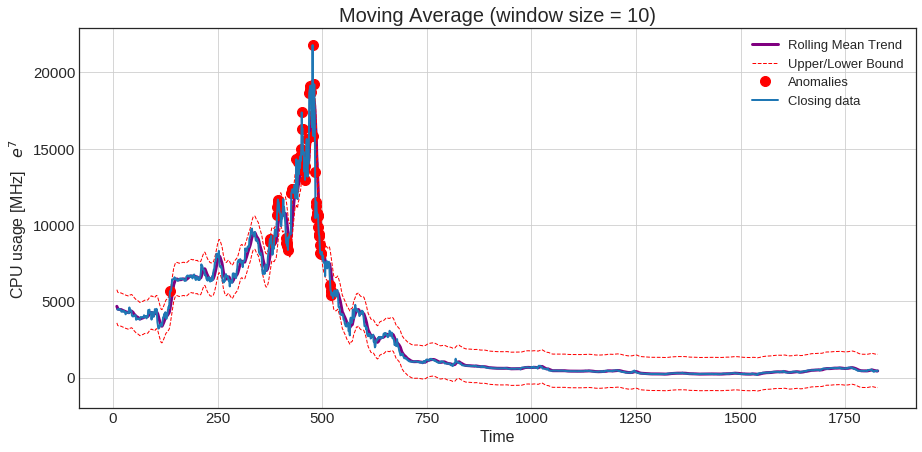

In [57]:
plotMovingAverage(df_data[['close (USD)']], 10, plot_intervals=True, plot_anomalies=True)